# Machine Learning
Using the data collected, I wanted to build a machine learning model using supervised learning that can predict the income level of the countries mentioned in the tweet, based on the level of engagements. However, since different Twitter news accounts have different levels of engagements based on the number of followers, thus, it wouldn't make to merge all the data today. Instead, I will focus on running this on the CNN account

In [976]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt

In [977]:
cnn_df = pd.read_csv("CNN Breaking News.csv") #read csv data

In [978]:
cnn_df = cnn_df[["# Reactions","Final Countries"]]

In [979]:
index_lis = []
for index in range(0,len(cnn_df)): #itterate through all countries in the dataframe
    country = cnn_df.at[index, "Final Countries"]
           
    if country == "['']":
        index_lis.append(index)
    
    country = country.replace("[","").replace("]","")
    lis = country.split(",")

    final_countries_list = []
    for i in lis:
        i = i.strip().replace("'","").replace("''","")
        final_countries_list.append(i)
    
    if len(final_countries_list) != 1:
        index_lis.append(index)


In [980]:
cnn_df = cnn_df.drop(cnn_df.index[index_lis]).reset_index()

In [981]:
cnn_df

,index,# Reactions,Final Countries
0,0,344,['Australia']
1,1,1280,['United States']
2,2,1545,['Netherlands']
3,3,1579,['France']
4,6,4923,['United States']
...,...,...,...
2584,3195,824,['United States']
2585,3196,1223,['United Kingdom']
2586,3197,887,['United Kingdom']
2587,3198,864,['United States']


In [982]:
cnn_df["Income Level"] = ""

Drop all rows without a country mentioned

In [987]:
for index in range(0,len(cnn_df)): #itterate through all countries in the dataframe
    country = cnn_df.at[index,"Final Countries"]
    country = country.replace("[","").replace("]","")
    
    lis = country.split(",")

    final_countries_list = []
    for i in lis:
        i = i.strip().replace("'","").replace("''","")
        final_countries_list.append(i)
    country = final_countries_list[0]
    cnn_df.at[index,"Final Countries"] = country
    try:
        country_income = wbdata.search_countries(country)[0]["incomeLevel"]["value"] 
        cnn_df.at[index,"Income Level"] = country_income
    except:
        pass

In [988]:
cnn_df

,index,# Reactions,Final Countries,Income Level
0,0,344,Australia,High income
1,1,1280,United States,High income
2,2,1545,Netherlands,High income
3,3,1579,France,High income
4,6,4923,United States,High income
...,...,...,...,...
2584,3195,824,United States,High income
2585,3196,1223,United Kingdom,High income
2586,3197,887,United Kingdom,High income
2587,3198,864,United States,High income


## Extract the income level of the countries
This part uses the world bank wbdata library based on the World Bank Data. It takes in the country and finds the income level according to the World Bank's metrics on GNI per capita of the country. 

In [989]:
import wbdata 

In [1003]:
"""This function uses the library pycountry to find the continent of the country."""
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2) #continent code
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code) #continent name
        
    except:
        pass

    return country_continent_name

To make a more accurate model, I add it the variable Continent for each country.

In [1024]:
"""Iterate through the dataframe to find the continent of each country"""
cnn_df["Continents"] = ""
for index in range(0,len(cnn_df)):
    country = cnn_df.at[index, "Final Countries"]
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code) 
    except:
        pass
    cnn_df.at[index,"Continents"] = country_continent_name


In [1028]:
cnn_df = cnn_df[cnn_df['Continents'].map(lambda d: d[0]) != "None"] #drop rows if can't find continent

In [1029]:
cnn_df.to_csv("CNN ML.csv") #export to csv to save data

In [782]:
#cnn_df = pd.read_csv("CNN ML.csv")

# Build a DecisionTree Classifier
This section builds a decision tree that uses supervised learning, to predict the income level of the country

In [1030]:
"""
Drop the two income levels (not classified & aggregates) that don't have countries
"""
cnn_df = cnn_df.drop(cnn_df[(cnn_df['Income Level'] == 'Not classified') | (cnn_df['Income Level'] == 'Aggregates') ].index).reset_index(drop=True)


## Simple DecisionTree Classifier (without training)

In [1154]:
#this is for building the numpy array for X
df_x = cnn_df[["Continents","# Reactions"]]
X = df_x.values

In [1155]:
y,class_names = pd.factorize(y)

In [1156]:
relative = df_x["# Reactions"]

In [1157]:
df_x = pd.get_dummies(df_x["Continents"]) #turn the continents to dummy variables

In [1158]:
df_x = pd.concat([relative,df_x], axis = 1)
df_x

,# Reactions,Africa,Asia,Europe,North America,Oceania,South America
0,344,0,0,0,0,1,0
1,1280,0,0,0,1,0,0
2,1545,0,0,1,0,0,0
3,1579,0,0,1,0,0,0
4,4923,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2578,824,0,0,0,1,0,0
2579,1223,0,0,1,0,0,0
2580,887,0,0,1,0,0,0
2581,864,0,0,0,1,0,0


In [1159]:
#turn dataframe into array
X = df_x.to_numpy()
X[:5]

array([[ 344,    0,    0,    0,    0,    1,    0],
       [1280,    0,    0,    0,    1,    0,    0],
       [1545,    0,    0,    1,    0,    0,    0],
       [1579,    0,    0,    1,    0,    0,    0],
       [4923,    0,    0,    0,    1,    0,    0]])

### Build a classifier

In [1176]:
#build a classifier
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf

DecisionTreeClassifier(max_depth=3, random_state=0)

In [1177]:
#fit the classifier
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [1178]:
#Validate the classifier
clf.score(X, y)

0.8312040263259776

In [1179]:
#feature names for the X
feature_names = list(df_x.columns)
print(feature_names)

['# Reactions', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [1180]:
#class names for the Y
class_names = ["High income","Upper middle income","Lower middle income","Low income"]

<ipython-input-1181-95624d11ed0f>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


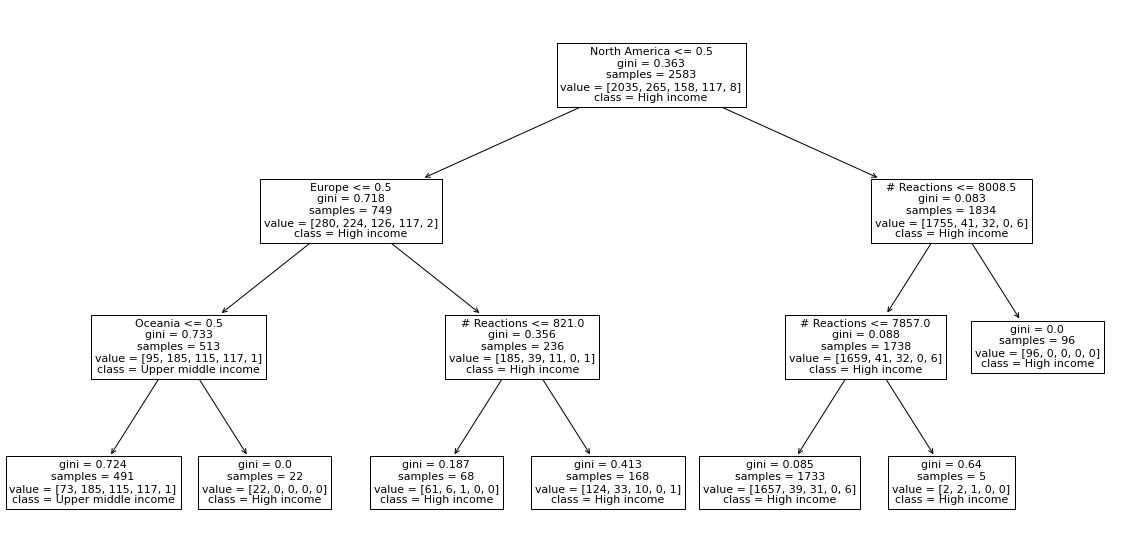

In [1181]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names = class_names,fontsize=11)
fig.show()

## Training model
Using the sklearn library to create train/test splits of the data.

In [1182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [1183]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.816247582205029

# Grid Search for decision Tree
This is use to find the best classifier for the tree

In [1184]:
# We will use only two parameters for the search
grid_params = {'criterion':['gini','entropy'],
               'max_depth':range(2,20)}


# Initialize the gridsearch object
gs = GridSearchCV(
    tree.DecisionTreeClassifier(random_state=10),
    grid_params,
    verbose=1,         
    cv=3               
)

# Perform fitting across all grid search candidates
gs_results = gs.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [1185]:
#finds test best classifier for the tree
for i, score in enumerate(gs_results.cv_results_['rank_test_score']):
    if score == 1:
        print(gs_results.cv_results_['params'][i])

{'criterion': 'entropy', 'max_depth': 4}


#### The best classifer is wiht a max_depth of 4

<ipython-input-1186-99839ebee793>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


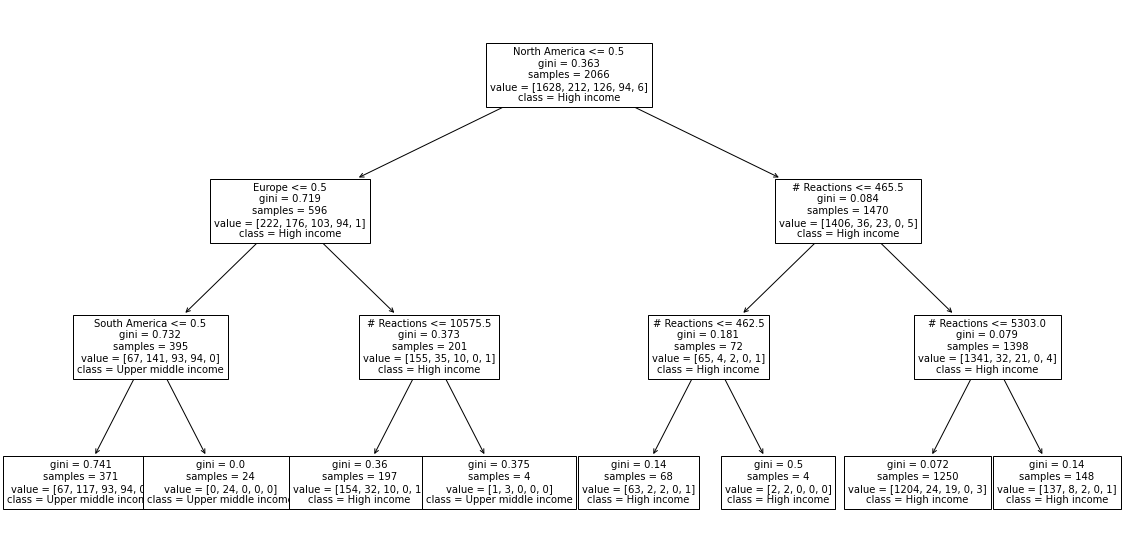

In [1186]:
tree.DecisionTreeClassifier(random_state=0, max_depth=4)
fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names = feature_names, class_names = class_names,fontsize=10)
fig.show()

### Cross Validate to ensure the model works

In [1187]:
from sklearn.model_selection import cross_validate, cross_val_predict

In [1188]:
# First initialize the classifier
decisiontree = tree.DecisionTreeClassifier(random_state=10, max_depth=5)


# Perform cross-validation
cv_results_cv = cross_validate(decisiontree, 
                                X,
                                y,
                                cv=5
                                )
# Show results
cv_results_cv

{'fit_time': array([0.00596976, 0.00417304, 0.00387216, 0.002949  , 0.00306892]),
 'score_time': array([0.00074005, 0.00064588, 0.00041175, 0.00047207, 0.00045586]),
 'test_score': array([0.86653772, 0.80077369, 0.8065764 , 0.85077519, 0.84883721])}

In [1189]:
# Perform cross-validation
cv_results_cvp = cross_val_predict(decisiontree, 
                                   X,
                                   y,
                                   cv=5
                                   )
# Show results
cv_results_cvp

array([0, 0, 0, ..., 0, 0, 0])

#### We achieve an average accuracy of 83.4%.

In [1190]:
average_accuracy = sum(cv_results_cv['test_score'])/len(cv_results_cv['test_score'])
average_accuracy

0.8347000434828242

## Confusion Matrix
To find where the model has the least accuracy, we use ConfusionMatrixDisplay to find the percentages. 

In [1191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

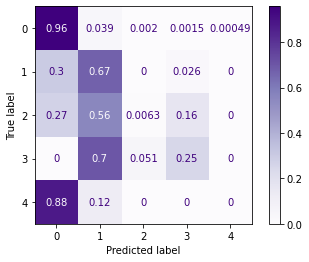

In [1192]:
cm = confusion_matrix(y, cv_results_cvp, normalize='true') #use normalize to compare with a percent
cmd = ConfusionMatrixDisplay(cm,display_labels = clf.classes_)
cmd.plot(cmap="Purples")